In [41]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Preparando os DataFrames para 333 para as analises de área


In [42]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos333_ativos = prceossos_ativos.merge(eventos333,how='inner',on='DSProcesso')
#Transformando o campo de data do evento333 em datetime
processos333_ativos['Data'] = pd.to_datetime(processos333_ativos.DTEvento).dt.year
#Filtrando os processos 333 ativos com a base de ouro:
processos333_ativos_ouro = processos333_ativos[processos333_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(processos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = processos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_333_regiao['QTAreaHA'] = join_333_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
join_333_regiao

C:\Users\User\AppData\Local\Temp\ipykernel_16352\2493657228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16352\2493657228.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]


,Unnamed: 0_x,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,...,Unnamed: 0_y,IDEvento,DTEvento,Evento_,Data,Unnamed: 0,IDMunicipio,Municipios,UF,Regiao
1,10544,815.187/2022,815187,2022,S,48066.815187/2022-24,2.0,5,11,48066.0,...,1526270,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214686,4206306,GUABIRUBA,SC,Sul
3,10587,815.188/2022,815188,2022,S,48066.815188/2022-79,2.0,5,11,48066.0,...,1526692,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214745,4206306,GUABIRUBA,SC,Sul
4,10630,815.189/2022,815189,2022,S,48066.815189/2022-13,2.0,5,11,48066.0,...,1527201,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214795,4202909,BRUSQUE,SC,Sul
5,56386,820.434/2007,820434,2007,S,48402.820434/2007-15,2.0,5,2,48402.0,...,2058950,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2007,271133,3523305,ITARIRI,SP,Sudeste
6,65703,820.657/2006,820657,2006,S,48402.820657/2006-93,2.0,5,2,48402.0,...,2172757,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2006,282792,3523305,ITARIRI,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,842873,806.127/2015,806127,2015,S,48422.806127/2015-95,24.0,6,22,48422.0,...,820903,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,115989,2112407,TURIAÇU,MA,Nordeste
19040,843322,806.146/2021,806146,2021,S,48078.806146/2021-27,2.0,5,22,48078.0,...,826075,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116533,2103158,CENTRO DO GUILHERME,MA,Nordeste
19041,843502,806.155/2021,806155,2021,S,48078.806155/2021-18,2.0,5,22,48078.0,...,827764,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116744,2103158,CENTRO DO GUILHERME,MA,Nordeste
19042,843697,806.165/2021,806165,2021,S,48078.806165/2021-53,2.0,5,22,48078.0,...,829788,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116978,2103174,CENTRO NOVO DO MARANHÃO,MA,Nordeste


## Plotando agora os mesmos gráficos mas para área 

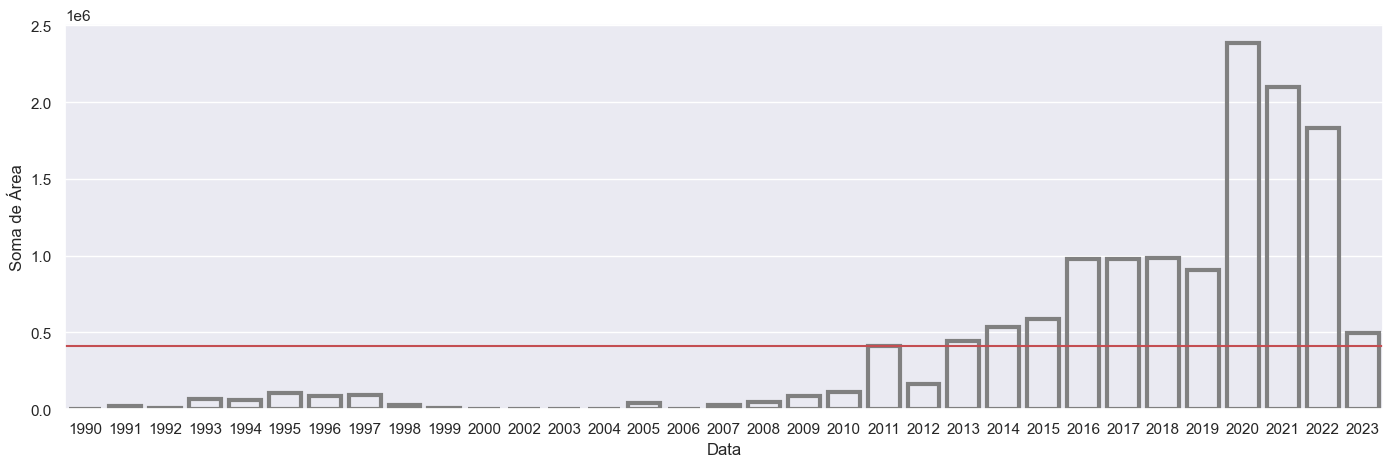

In [44]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_333 = join_333_regiao.groupby('Data').sum()

y = sns.barplot(
    data=area_pedida_333, x=area_pedida_333.index, y="QTAreaHA", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.set(xlabel='Data', ylabel='Soma de Área')
y.axhline(area_pedida_333['QTAreaHA'].mean(),color ='r')
plt.show()

## Plotando a área por ano mas quebrando para Regiao e um plot de Regiao quebrando por UF

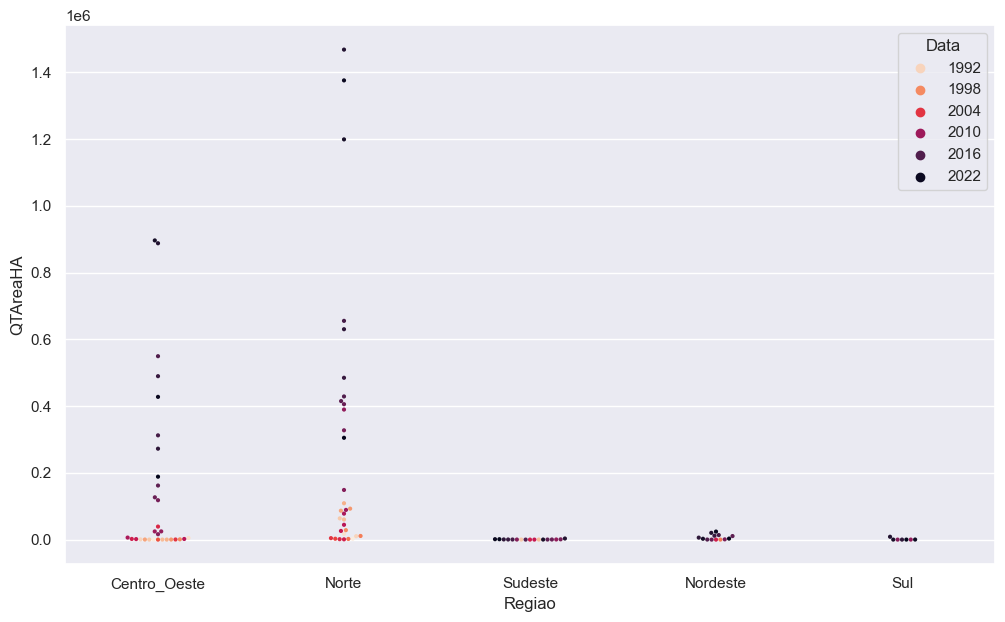

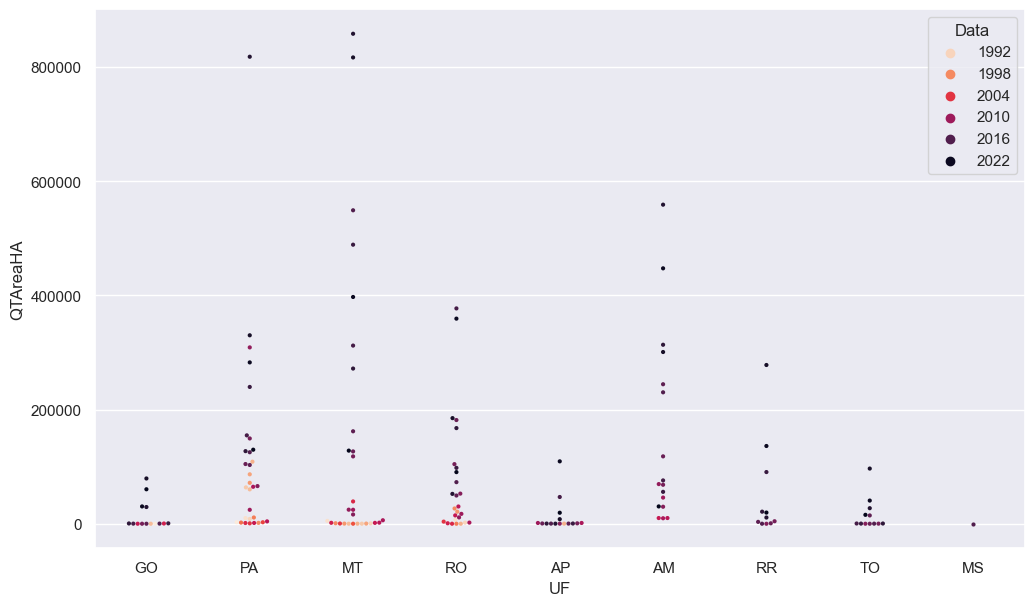

In [53]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)})
palette=plt.get_cmap('rocket').reversed()

data_regiao_333= join_333_regiao.groupby(['Data','Regiao'], as_index=False).sum()
sns.swarmplot(data=data_regiao_333, x="Regiao",y='QTAreaHA',hue=data_regiao_333.Data, legend='auto',size = 3,palette=palette)
plt.show()

data_regiao_UF_333= join_333_regiao.query('Regiao=="Norte" or Regiao=="Centro_Oeste"').groupby(['Data','UF','Regiao'], as_index=False).sum()
data_regiao_UF_333
sns.swarmplot(data=data_regiao_UF_333, x="UF",y='QTAreaHA',hue ='Data' ,size = 3, legend='auto',palette=palette)
plt.show()

## Preparando os dados para analisar area 513

In [54]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos513_ativos = prceossos_ativos.merge(eventos513,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos513_ativos['Data'] = pd.to_datetime(processos513_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos513_ativos_ouro = processos513_ativos[processos513_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(processos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = processos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_513_regiao['QTAreaHA'] = join_513_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')


C:\Users\User\AppData\Local\Temp\ipykernel_16352\807547001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16352\807547001.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]


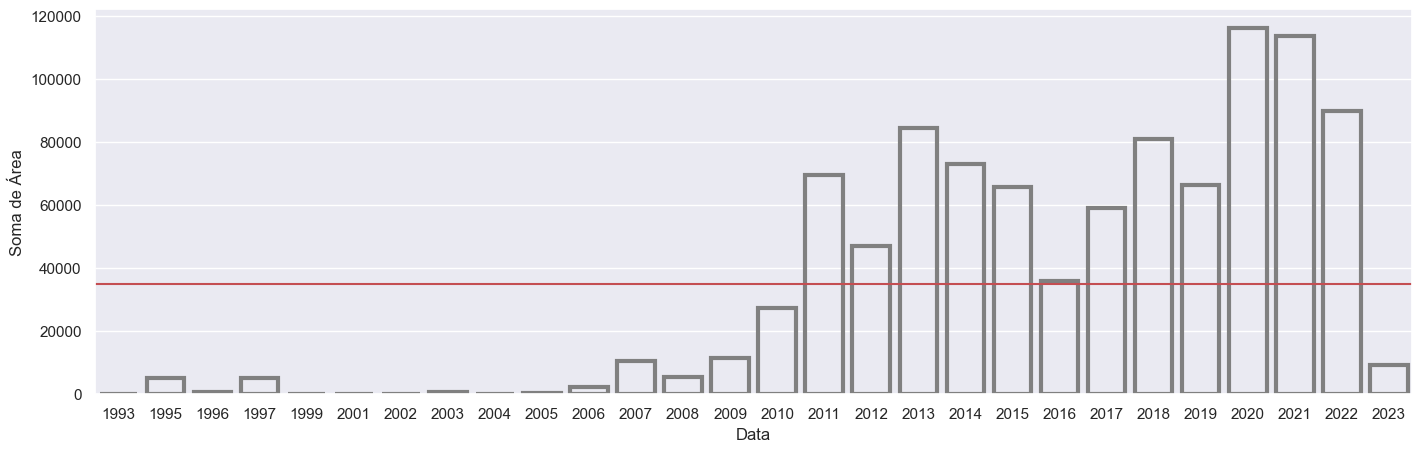

In [52]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_513 = full_join.groupby('Data_x').sum()

y = sns.barplot(
    data=area_pedida_513, x=area_pedida_513.index, y="QTAreaHA_x", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.axhline(area_pedida_513['QTAreaHA_x'].mean(),color ='r')
y.set(xlabel='Data', ylabel='Soma de Área')
plt.show()

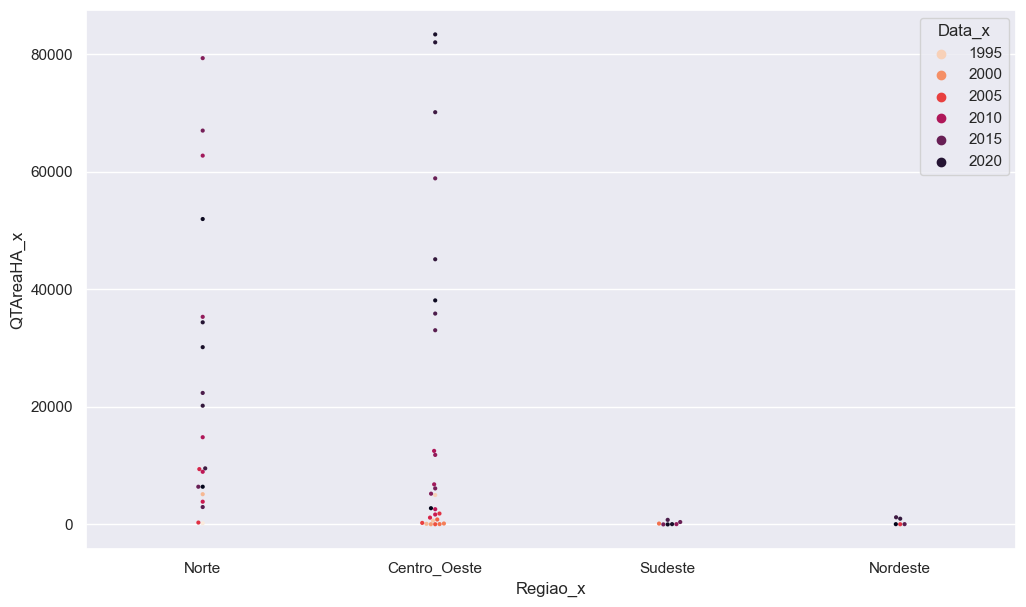

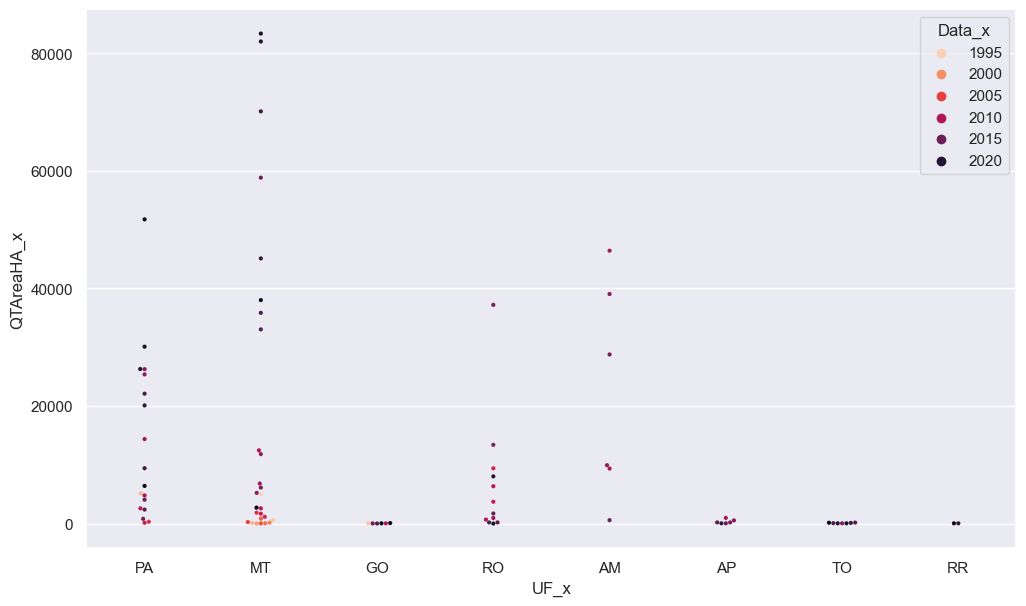

In [56]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)})
palette=plt.get_cmap('rocket').reversed()

data_regiao_513= full_join.groupby(['Data_x','Regiao_x'], as_index=False).sum()
sns.swarmplot(data=data_regiao_513, x="Regiao_x",y='QTAreaHA_x',hue=data_regiao_513.Data_x, legend='auto',size = 3,palette=palette)
plt.show()

data_regiao_UF_513= full_join.query('Regiao_x=="Norte" or Regiao_x=="Centro_Oeste"').groupby(['Data_x','UF_x','Regiao_x'], as_index=False).sum()
palette=plt.get_cmap('rocket').reversed()
sns.swarmplot(data=data_regiao_UF_513, x="UF_x",y='QTAreaHA_x',hue ='Data_x' ,size = 3, legend='auto',palette=palette)
plt.show()

In [51]:
area_pedida_333['QTAreaHA'].mean()

413021.95939393947